<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

Just a quick notebook to look at and prepare the radar data. For now we only have the data from 2014, but maybe we can augment it.

In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
from importlib import reload
import models.utils; reload(models.utils)
from models.utils import *
%matplotlib inline
from skimage.measure import block_reduce

In [14]:
# This is the raw radar data
radar_data  = np.load('/local/S.Rasp/tmp/radar.npy')
radar_data.shape

(8760, 128, 128)

In [16]:
# First, kick out NaNs
radar_data[np.isnan(radar_data)] = 0

I will not normalize the data now because I would like to try different options later.

In [20]:
# Downscale to 64*64
def halve_imsize(a):
    return block_reduce(a, (1, 2, 2), np.mean)

In [21]:
radar_data_halved = halve_imsize(radar_data)
radar_data_halved.shape

(8760, 64, 64)

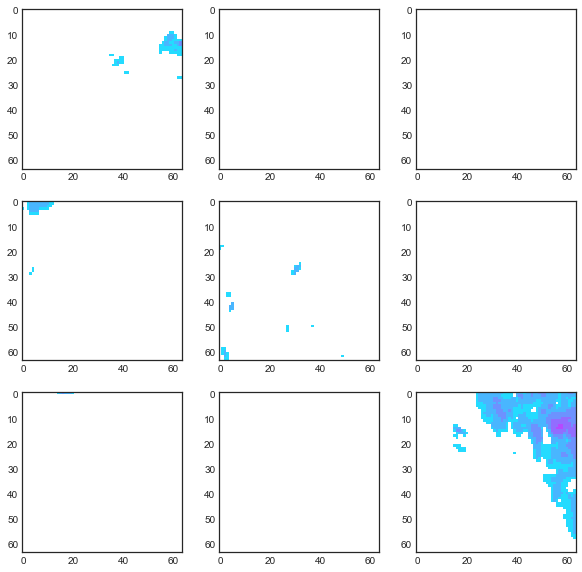

In [22]:
plot_stamps(radar_data_halved[np.random.randint(0, 8760, 9)])

In [8]:
# Save the data
np.save('/local/S.Rasp/tmp/radar_prepped.npy', radar_data_halved)

In [23]:
X = np.copy(radar_data_halved)

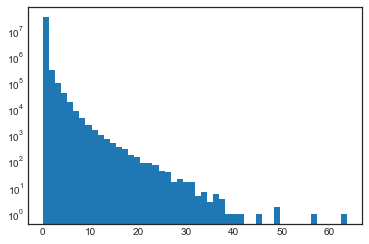

In [24]:
# Plot histogram of pixel values
plt.hist(np.ravel(X), bins=50);
plt.yscale('log')

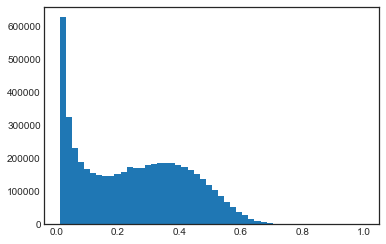

In [53]:
plt.hist(np.ravel(log_normalize(X)), bins=50, range=(0.01, 1));


In [39]:
# Compute coverage fraction of values larger 0.1
cov_frac = np.sum(X > 0.1, axis=(1,2)) / (64*64)

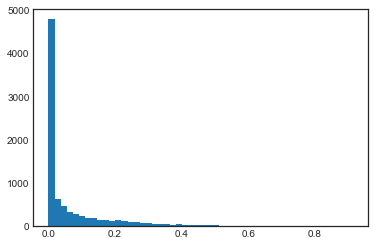

In [40]:
plt.hist(cov_frac, bins=50);

In [42]:
np.sum(cov_frac == 0), X.shape

(2255, (8760, 64, 64))

In [43]:
a = X[cov_frac > 0]

In [44]:
a.shape

(6505, 64, 64)

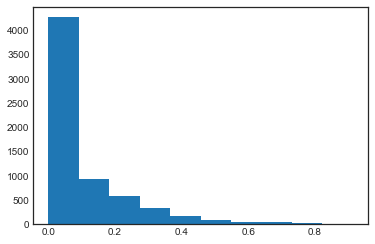

In [46]:
plt.hist(cov_frac[cov_frac > 0]);

In [ ]:
# Try augmenting
b = 

In [51]:
log_normalize(np.array([0, 0.1, 0.3, 1.0, 3.0, 10., 30., 100]))

array([ 0.        ,  0.23978953,  0.34339872,  0.46151205,  0.57071103,
        0.69087548,  0.80067008,  0.92104404])